In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Database connection

In [2]:
from sqlalchemy import create_engine
# username = 'sa'
# password = 'orange505'
# server = 'server'
# database = 'Orange_Hrms_Odoo'

import urllib
params = urllib.parse.quote_plus("DRIVER={SQL Server};"
                                 "SERVER=server;"
                                 "DATABASE=Orange_Hrms_Odoo;"
                                 "UID=sa;"
                                 "PWD=orange505")

engine = create_engine("mssql+pyodbc:///?odbc_connect={}".format(params))

# Test the connection
try:
    with engine.connect() as connection:
        print("Connected successfully!")
except Exception as e:
    print("Connection failed:", e)


Connected successfully!


 Add Increament Id or Join Increament Table

In [3]:
# Select Top 1000 Emp_Left,S.* from T0080_EMP_MASTER E inner join  T0200_MONTHLY_SALARY S on E.Emp_ID = S.Emp_ID where E.Emp_Left = 'N' AND  Cmp_ID = 120
df = pd.read_sql("Select E.Emp_ID, E.Alpha_Emp_Code, E.Marital_Status, E.Desig_Id, E.Emp_Left, E.Dept_ID, E.Gender, E.Date_Of_Birth, E.Date_Of_Join, E.Emp_Left_Date, E.State, E.City, E.Probation, S.Basic_Salary, S.Gross_Salary, D.Dept_Name from  T0080_EMP_MASTER E inner join T0200_MONTHLY_SALARY S on E.Emp_ID = S.Emp_ID inner join T0040_DEPARTMENT_MASTER D on E.Dept_ID = D.Dept_ID where E.Cmp_id in (119,120)", engine)
df

,Emp_ID,Alpha_Emp_Code,Marital_Status,Desig_Id,Emp_Left,Dept_ID,Gender,Date_Of_Birth,Date_Of_Join,Emp_Left_Date,State,City,Probation,Basic_Salary,Gross_Salary,Dept_Name
0,13959.0,A0001,1,604.0,Y,303.0,M,1988-03-17,2008-12-01,2016-12-30,Karnataka,aaaa,0.0,30000.0,50751.00,Software
1,13967.0,A0009,1,616.0,Y,303.0,M,1983-02-03,2012-04-01,2015-12-01,GUJARAT,AHMEDABAD,0.0,30000.0,24557.00,Software
2,13968.0,A0010,0,616.0,Y,303.0,M,1990-01-25,2008-12-01,2015-11-30,Gujarat,AHMEDABAD,0.0,30000.0,50851.00,Software
3,13968.0,A0010,0,616.0,Y,303.0,M,1990-01-25,2008-12-01,2015-11-30,Gujarat,AHMEDABAD,0.0,30000.0,50751.00,Software
4,13968.0,A0010,0,616.0,Y,303.0,M,1990-01-25,2008-12-01,2015-11-30,Gujarat,AHMEDABAD,0.0,30000.0,44715.00,Software
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8037,14562.0,B0003,1,621.0,N,765.0,F,1992-08-15,2008-08-26,NaT,Gujarat,test,0.0,38000.0,20197.87,Deepal
8038,14560.0,B0001,1,833.0,N,460.0,M,1980-10-06,2015-01-01,NaT,Gujarat,Vadodara,0.0,60500.0,14564.52,Human Resource
8039,19081.0,A5496,1,659.0,N,313.0,M,1988-03-17,2017-04-01,NaT,Gujarat,Aithor,0.0,20000.0,6004.90,Software
8040,21162.0,B5953,3,659.0,N,313.0,M,1988-03-17,2017-01-01,NaT,,,0.0,15000.0,5354.00,Software


In [4]:
df.drop_duplicates(subset=['Alpha_Emp_Code'], inplace=True)

In [5]:
df.head()

,Emp_ID,Alpha_Emp_Code,Marital_Status,Desig_Id,Emp_Left,Dept_ID,Gender,Date_Of_Birth,Date_Of_Join,Emp_Left_Date,State,City,Probation,Basic_Salary,Gross_Salary,Dept_Name
0,13959.0,A0001,1,604.0,Y,303.0,M,1988-03-17,2008-12-01,2016-12-30,Karnataka,aaaa,0.0,30000.0,50751.0,Software
1,13967.0,A0009,1,616.0,Y,303.0,M,1983-02-03,2012-04-01,2015-12-01,GUJARAT,AHMEDABAD,0.0,30000.0,24557.0,Software
2,13968.0,A0010,0,616.0,Y,303.0,M,1990-01-25,2008-12-01,2015-11-30,Gujarat,AHMEDABAD,0.0,30000.0,50851.0,Software
5,14459.0,A0501,0,615.0,N,305.0,M,1990-05-15,2013-05-01,NaT,GUJARAT,AHMEDABAD,0.0,30000.0,49871.0,Support
7,14158.0,A0200,0,618.0,Y,306.0,M,1988-01-15,2010-08-17,2016-11-28,GUJARAT,AHMEDABAD,0.0,30000.0,49871.0,Sales


In [6]:
df.tail()

,Emp_ID,Alpha_Emp_Code,Marital_Status,Desig_Id,Emp_Left,Dept_ID,Gender,Date_Of_Birth,Date_Of_Join,Emp_Left_Date,State,City,Probation,Basic_Salary,Gross_Salary,Dept_Name
8006,30101.0,B10945,0,659.0,N,313.0,M,1989-08-15,2023-01-01,NaT,,,0.0,19000.0,28600.00,Software
8009,30103.0,B10947,0,659.0,N,313.0,M,1989-08-15,2023-01-01,NaT,,,0.0,17500.0,26500.00,Software
8011,30104.0,B10948,0,659.0,Y,313.0,M,1989-08-15,2023-01-01,2023-12-23,,,0.0,19000.0,28600.00,Software
8015,30110.0,B10955,0,659.0,N,313.0,M,1989-08-15,2023-01-01,NaT,,,0.0,9300.0,75020.00,Software
8041,28179.0,B10436,0,1445.0,N,327.0,M,1997-05-28,2022-10-11,NaT,Andhra Pradesh,NDD,0.0,4000.0,13349.41,Testing & Automation Department


In [7]:
# Dateformat to str
df["Date_Of_Birth"] = df["Date_Of_Birth"].dt.strftime("%d/%m/%Y")
df["Date_Of_Join"] = df["Date_Of_Join"].dt.strftime("%d/%m/%Y")
df["Emp_Left_Date"] = df["Emp_Left_Date"].dt.strftime("%d/%m/%Y")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2771 entries, 0 to 8041
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Emp_ID          2771 non-null   float64
 1   Alpha_Emp_Code  2771 non-null   object 
 2   Marital_Status  2771 non-null   object 
 3   Desig_Id        2771 non-null   float64
 4   Emp_Left        2771 non-null   object 
 5   Dept_ID         2771 non-null   float64
 6   Gender          2771 non-null   object 
 7   Date_Of_Birth   2693 non-null   object 
 8   Date_Of_Join    2771 non-null   object 
 9   Emp_Left_Date   256 non-null    object 
 10  State           2770 non-null   object 
 11  City            2770 non-null   object 
 12  Probation       2771 non-null   float64
 13  Basic_Salary    2771 non-null   float64
 14  Gross_Salary    2762 non-null   float64
 15  Dept_Name       2771 non-null   object 
dtypes: float64(6), object(10)
memory usage: 368.0+ KB


In [9]:
df

,Emp_ID,Alpha_Emp_Code,Marital_Status,Desig_Id,Emp_Left,Dept_ID,Gender,Date_Of_Birth,Date_Of_Join,Emp_Left_Date,State,City,Probation,Basic_Salary,Gross_Salary,Dept_Name
0,13959.0,A0001,1,604.0,Y,303.0,M,17/03/1988,01/12/2008,30/12/2016,Karnataka,aaaa,0.0,30000.0,50751.00,Software
1,13967.0,A0009,1,616.0,Y,303.0,M,03/02/1983,01/04/2012,01/12/2015,GUJARAT,AHMEDABAD,0.0,30000.0,24557.00,Software
2,13968.0,A0010,0,616.0,Y,303.0,M,25/01/1990,01/12/2008,30/11/2015,Gujarat,AHMEDABAD,0.0,30000.0,50851.00,Software
5,14459.0,A0501,0,615.0,N,305.0,M,15/05/1990,01/05/2013,NaN,GUJARAT,AHMEDABAD,0.0,30000.0,49871.00,Support
7,14158.0,A0200,0,618.0,Y,306.0,M,15/01/1988,17/08/2010,28/11/2016,GUJARAT,AHMEDABAD,0.0,30000.0,49871.00,Sales
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8006,30101.0,B10945,0,659.0,N,313.0,M,15/08/1989,01/01/2023,NaN,,,0.0,19000.0,28600.00,Software
8009,30103.0,B10947,0,659.0,N,313.0,M,15/08/1989,01/01/2023,NaN,,,0.0,17500.0,26500.00,Software
8011,30104.0,B10948,0,659.0,Y,313.0,M,15/08/1989,01/01/2023,23/12/2023,,,0.0,19000.0,28600.00,Software
8015,30110.0,B10955,0,659.0,N,313.0,M,15/08/1989,01/01/2023,NaN,,,0.0,9300.0,75020.00,Software


In [10]:
df.to_csv('file1.csv')

In [11]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_objects = df.select_dtypes('object')

In [12]:
df_objects

,Alpha_Emp_Code,Marital_Status,Emp_Left,Gender,Date_Of_Birth,Date_Of_Join,Emp_Left_Date,State,City,Dept_Name
0,A0001,1,Y,M,17/03/1988,01/12/2008,30/12/2016,Karnataka,aaaa,Software
1,A0009,1,Y,M,03/02/1983,01/04/2012,01/12/2015,GUJARAT,AHMEDABAD,Software
2,A0010,0,Y,M,25/01/1990,01/12/2008,30/11/2015,Gujarat,AHMEDABAD,Software
5,A0501,0,N,M,15/05/1990,01/05/2013,NaN,GUJARAT,AHMEDABAD,Support
7,A0200,0,Y,M,15/01/1988,17/08/2010,28/11/2016,GUJARAT,AHMEDABAD,Sales
...,...,...,...,...,...,...,...,...,...,...
8006,B10945,0,N,M,15/08/1989,01/01/2023,NaN,,,Software
8009,B10947,0,N,M,15/08/1989,01/01/2023,NaN,,,Software
8011,B10948,0,Y,M,15/08/1989,01/01/2023,23/12/2023,,,Software
8015,B10955,0,N,M,15/08/1989,01/01/2023,NaN,,,Software


In [13]:
df_objects.columns

Index(['Alpha_Emp_Code', 'Marital_Status', 'Emp_Left', 'Gender',
       'Date_Of_Birth', 'Date_Of_Join', 'Emp_Left_Date', 'State', 'City',
       'Dept_Name'],
      dtype='object')

In [14]:
df_objects.isnull().sum()

Alpha_Emp_Code       0
Marital_Status       0
Emp_Left             0
Gender               0
Date_Of_Birth       78
Date_Of_Join         0
Emp_Left_Date     2515
State                1
City                 1
Dept_Name            0
dtype: int64

In [15]:
df_numeric

,Emp_ID,Desig_Id,Dept_ID,Probation,Basic_Salary,Gross_Salary
0,13959.0,604.0,303.0,0.0,30000.0,50751.00
1,13967.0,616.0,303.0,0.0,30000.0,24557.00
2,13968.0,616.0,303.0,0.0,30000.0,50851.00
5,14459.0,615.0,305.0,0.0,30000.0,49871.00
7,14158.0,618.0,306.0,0.0,30000.0,49871.00
...,...,...,...,...,...,...
8006,30101.0,659.0,313.0,0.0,19000.0,28600.00
8009,30103.0,659.0,313.0,0.0,17500.0,26500.00
8011,30104.0,659.0,313.0,0.0,19000.0,28600.00
8015,30110.0,659.0,313.0,0.0,9300.0,75020.00


Numeric Column Taken 
1. Emp_ID, Branch_ID, Dept_ID, Shift_ID, Travel_Amount, Present_On_Holiday, Bond_Amount,PROBATION

In [16]:
df_numeric.isnull().sum()

Emp_ID          0
Desig_Id        0
Dept_ID         0
Probation       0
Basic_Salary    0
Gross_Salary    9
dtype: int64

In [17]:
from datetime import datetime, date

today = date.today()
def age(born):
    if isinstance(born, str):
        born = datetime.strptime(born, "%d/%m/%Y").date()
        return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
    else:
        return 0

In [18]:
df["Date_Of_Birth"].isnull().sum()

78

In [19]:
df["Date_Of_Birth"].describe()

count           2693
unique           857
top       17/03/1988
freq             511
Name: Date_Of_Birth, dtype: object

In [20]:
df['Age'] = df['Date_Of_Birth'].apply(age)
df['Age']
# Gross_Salary

0       36
1       41
2       34
5       33
7       36
        ..
8006    34
8009    34
8011    34
8015    34
8041    26
Name: Age, Length: 2771, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2771 entries, 0 to 8041
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Emp_ID          2771 non-null   float64
 1   Alpha_Emp_Code  2771 non-null   object 
 2   Marital_Status  2771 non-null   object 
 3   Desig_Id        2771 non-null   float64
 4   Emp_Left        2771 non-null   object 
 5   Dept_ID         2771 non-null   float64
 6   Gender          2771 non-null   object 
 7   Date_Of_Birth   2693 non-null   object 
 8   Date_Of_Join    2771 non-null   object 
 9   Emp_Left_Date   256 non-null    object 
 10  State           2770 non-null   object 
 11  City            2770 non-null   object 
 12  Probation       2771 non-null   float64
 13  Basic_Salary    2771 non-null   float64
 14  Gross_Salary    2762 non-null   float64
 15  Dept_Name       2771 non-null   object 
 16  Age             2771 non-null   int64  
dtypes: float64(6), int64(1), object(10)
me

In [22]:
df = df.dropna(subset=["Dept_ID"])

In [23]:
df1 = df[['Emp_Left','Dept_ID','Age','Desig_Id','Marital_Status', 'Gender', 'State','City', 'Probation', 'Basic_Salary', 'Gross_Salary']]
df1

,Emp_Left,Dept_ID,Age,Desig_Id,Marital_Status,Gender,State,City,Probation,Basic_Salary,Gross_Salary
0,Y,303.0,36,604.0,1,M,Karnataka,aaaa,0.0,30000.0,50751.00
1,Y,303.0,41,616.0,1,M,GUJARAT,AHMEDABAD,0.0,30000.0,24557.00
2,Y,303.0,34,616.0,0,M,Gujarat,AHMEDABAD,0.0,30000.0,50851.00
5,N,305.0,33,615.0,0,M,GUJARAT,AHMEDABAD,0.0,30000.0,49871.00
7,Y,306.0,36,618.0,0,M,GUJARAT,AHMEDABAD,0.0,30000.0,49871.00
...,...,...,...,...,...,...,...,...,...,...,...
8006,N,313.0,34,659.0,0,M,,,0.0,19000.0,28600.00
8009,N,313.0,34,659.0,0,M,,,0.0,17500.0,26500.00
8011,Y,313.0,34,659.0,0,M,,,0.0,19000.0,28600.00
8015,N,313.0,34,659.0,0,M,,,0.0,9300.0,75020.00


In [24]:
# df1 = df1[df1['Dept_ID'].notna()]

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2771 entries, 0 to 8041
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Emp_Left        2771 non-null   object 
 1   Dept_ID         2771 non-null   float64
 2   Age             2771 non-null   int64  
 3   Desig_Id        2771 non-null   float64
 4   Marital_Status  2771 non-null   object 
 5   Gender          2771 non-null   object 
 6   State           2770 non-null   object 
 7   City            2770 non-null   object 
 8   Probation       2771 non-null   float64
 9   Basic_Salary    2771 non-null   float64
 10  Gross_Salary    2762 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 259.8+ KB


In [26]:
df1.isnull().sum()

Emp_Left          0
Dept_ID           0
Age               0
Desig_Id          0
Marital_Status    0
Gender            0
State             1
City              1
Probation         0
Basic_Salary      0
Gross_Salary      9
dtype: int64

In [27]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Dept_ID,2771.0,312.553230,41.309927,303.0,303.0,305.0,308.0,768.0
Age,2771.0,38.428726,10.080518,0.0,34.0,36.0,44.0,136.0
Desig_Id,2771.0,643.788524,103.764949,604.0,610.0,614.0,620.0,1496.0
Probation,2771.0,0.027066,0.355955,0.0,0.0,0.0,0.0,6.0
Basic_Salary,2771.0,21128.731267,40821.835824,0.0,12300.0,18000.0,30000.0,1700000.0
Gross_Salary,2762.0,29911.715565,59857.313348,-8093.0,15829.0,25800.0,35199.7,2382700.0


In [28]:
df1["Age"].max()

136

In [29]:
age_outelier = df1.loc[(df1['Age']>=65)]
age_outelier

,Emp_Left,Dept_ID,Age,Desig_Id,Marital_Status,Gender,State,City,Probation,Basic_Salary,Gross_Salary
46,N,305.0,68,615.0,1,M,GUJARAT,,0.0,30000.0,39000.00
140,Y,303.0,66,610.0,1,M,,,0.0,30000.0,50751.00
816,N,303.0,92,610.0,0,M,,,0.0,15000.0,26121.00
862,Y,308.0,68,611.0,0,M,Gujarat,,0.0,30000.0,33327.33
1400,N,305.0,67,610.0,1,M,GUJARAT,SURAT,0.0,30000.0,50171.00
1778,N,303.0,72,610.0,0,M,,,0.0,28000.0,41600.00
3578,Y,303.0,136,615.0,0,M,,,0.0,7000.0,7300.00


In [30]:
msk = (df1['Age'] >= 65)
df1 = df1[~msk]

In [31]:
objects = df1.select_dtypes('object')

In [32]:
df1['Emp_Left']

0       Y
1       Y
2       Y
5       N
7       Y
       ..
8006    N
8009    N
8011    Y
8015    N
8041    N
Name: Emp_Left, Length: 2764, dtype: object

In [33]:
# Target Col Emp_Left, Zip_code, Marital_Status, Gender, State, Induction_Training, Is_Piece_Trans_Salary , Date_Of_Join, EmpName_Alias_Salary

df1.isnull().sum()

Emp_Left          0
Dept_ID           0
Age               0
Desig_Id          0
Marital_Status    0
Gender            0
State             1
City              1
Probation         0
Basic_Salary      0
Gross_Salary      9
dtype: int64

In [34]:
# df1['Calculated_Day'] = df1['Calculated_Day'].fillna(0)
df1['Age'].fillna(df1['Age'].mean(), inplace=True)
df1['Gross_Salary'].fillna(df1['Gross_Salary'].mean(), inplace=True)
df1 = df1[df1['State'].notna()]
df1 = df1[df1['City'].notna()]

C:\Users\trainee\AppData\Local\Temp\ipykernel_11720\222618438.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Age'].fillna(df1['Age'].mean(), inplace=True)
C:\Users\trainee\AppData\Local\Temp\ipykernel_11720\222618438.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age'].fillna(df1['Age'].mean(), inplace=True)
C:\Users\traine

In [35]:
df1.isnull().sum()

Emp_Left          0
Dept_ID           0
Age               0
Desig_Id          0
Marital_Status    0
Gender            0
State             0
City              0
Probation         0
Basic_Salary      0
Gross_Salary      0
dtype: int64

In [36]:
for cat in objects:
    print(cat ,"=" , df1[cat].unique())

Emp_Left = ['Y' 'N']
Marital_Status = ['1' '0' '2' '' '3' '11' '10' '9' '8' '7' '6' '5' '4']
Gender = ['M' 'F']
State = ['Karnataka' 'GUJARAT' 'Gujarat' '' 'WEST BENGAL' 'MAHARASHTRA'
 '<--SELECT-->' 'ASSAM' 'JHARKHAND' 'ORISSA' 'RAJASTHAN' 'gujrat'
 'Maharashtra' 'Andhra Pradesh']
City = ['aaaa' 'AHMEDABAD' '' 'GANDHINAGAR' 'BARODA' 'SURAT' 'GANDHINAGAGAR'
 'ANAND' 'KAMRUP' 'SURENDRANAGAR' 'KHEDA' 'BARODA,' 'VADODARA' 'BHARUCH'
 'SABARKANTHA' 'MEHSANA' 'AHMEDABADD' 'NADIAD' 'RAJKOT' 'GANJAM' 'NAVSARI'
 'Vastral' 'Ahmedabad' 'Vadodara' 'memnagar' 'JUNAGADH' 'PANCHMAHAL'
 'JAMNAGAR' 'KACHCHH' 'KUTCH' 'PANCHAMAHAL' 'PUNE' ',AHMEDABAD' 'VALSAD'
 'KOLKATA' 'Aithor' 'test' 'vadodara' 'Mumbai' 'Ranchi' 'Bharuch'
 'ahmedabad' 'Ahemdabad' 'NDD']


In [37]:
df1['State'].value_counts()

State
                  1549
GUJARAT           1025
Gujarat            160
MAHARASHTRA          9
Maharashtra          6
WEST BENGAL          4
<--SELECT-->         3
Karnataka            1
ASSAM                1
JHARKHAND            1
ORISSA               1
RAJASTHAN            1
gujrat               1
Andhra Pradesh       1
Name: count, dtype: int64

In [38]:
# Handle Null Value City and State
df1['State'].replace('', 'Unknown', inplace=True)
df1['State'].replace('<--SELECT-->', 'Unknown', inplace=True)


C:\Users\trainee\AppData\Local\Temp\ipykernel_11720\2632874883.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['State'].replace('', 'Unknown', inplace=True)
C:\Users\trainee\AppData\Local\Temp\ipykernel_11720\2632874883.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [39]:
df1['State'].value_counts()

State
Unknown           1552
GUJARAT           1025
Gujarat            160
MAHARASHTRA          9
Maharashtra          6
WEST BENGAL          4
Karnataka            1
ASSAM                1
JHARKHAND            1
ORISSA               1
RAJASTHAN            1
gujrat               1
Andhra Pradesh       1
Name: count, dtype: int64

In [40]:
df1['City'].replace('', 'Unknown', inplace=True)

C:\Users\trainee\AppData\Local\Temp\ipykernel_11720\1182226218.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['City'].replace('', 'Unknown', inplace=True)


In [41]:
df1['City'].value_counts()

City
Unknown          1739
AHMEDABAD         767
BARODA             70
SURAT              46
GANDHINAGAR        25
Ahmedabad          15
KHEDA              13
ANAND               9
Vastral             9
RAJKOT              7
MEHSANA             7
BARODA,             6
Mumbai              6
VADODARA            5
BHARUCH             3
SURENDRANAGAR       3
NAVSARI             3
SABARKANTHA         2
JAMNAGAR            2
PANCHMAHAL          2
test                1
VALSAD              1
KOLKATA             1
Aithor              1
ahmedabad           1
vadodara            1
Ahemdabad           1
Ranchi              1
Bharuch             1
PUNE                1
,AHMEDABAD          1
aaaa                1
PANCHAMAHAL         1
KUTCH               1
KACHCHH             1
JUNAGADH            1
memnagar            1
Vadodara            1
GANJAM              1
NADIAD              1
AHMEDABADD          1
KAMRUP              1
GANDHINAGAGAR       1
NDD                 1
Name: count, dtype: int64

In [42]:
print("All columns Unique values count")
for col in df1:
    print(col, len(df1[col].unique()), sep=': ')

All columns Unique values count
Emp_Left: 2
Dept_ID: 30
Age: 46
Desig_Id: 37
Marital_Status: 13
Gender: 2
State: 13
City: 44
Probation: 6
Basic_Salary: 164
Gross_Salary: 1091


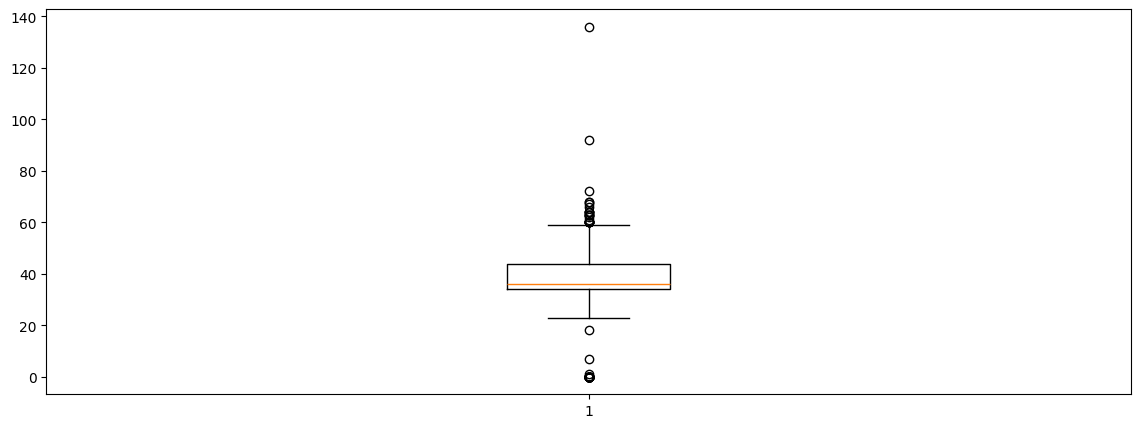

In [43]:
plt.figure(figsize=(14, 5))
plt.boxplot( x=df["Age"]) 
plt.show()

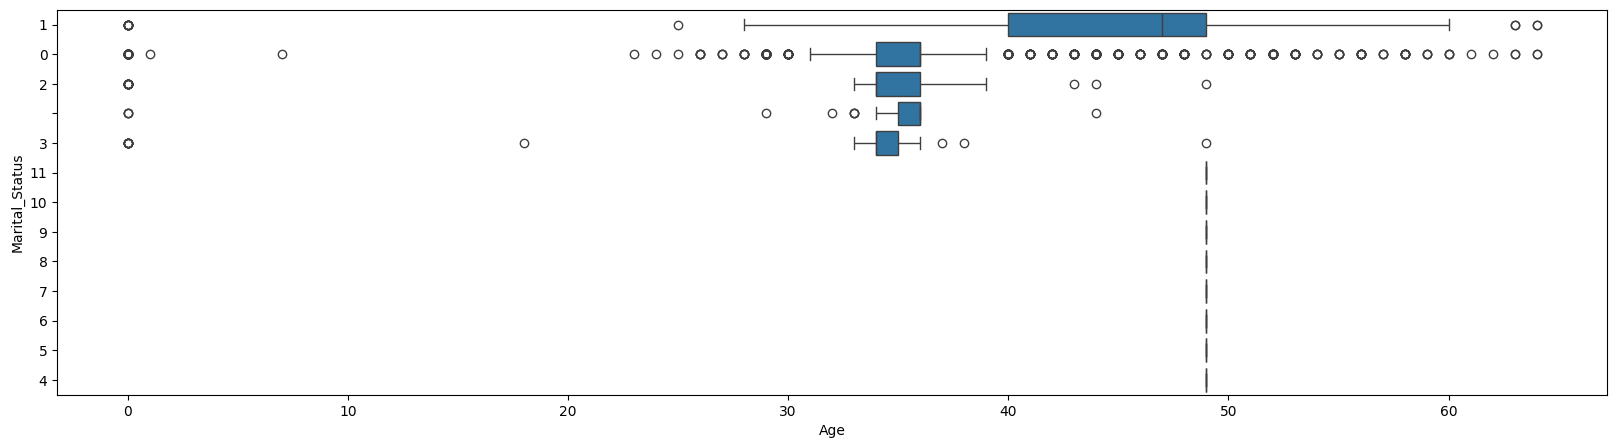

In [44]:
plt.figure(figsize=(20, 5))
sns.boxplot(y=df1["Marital_Status"], x=df1["Age"]) 
plt.show()

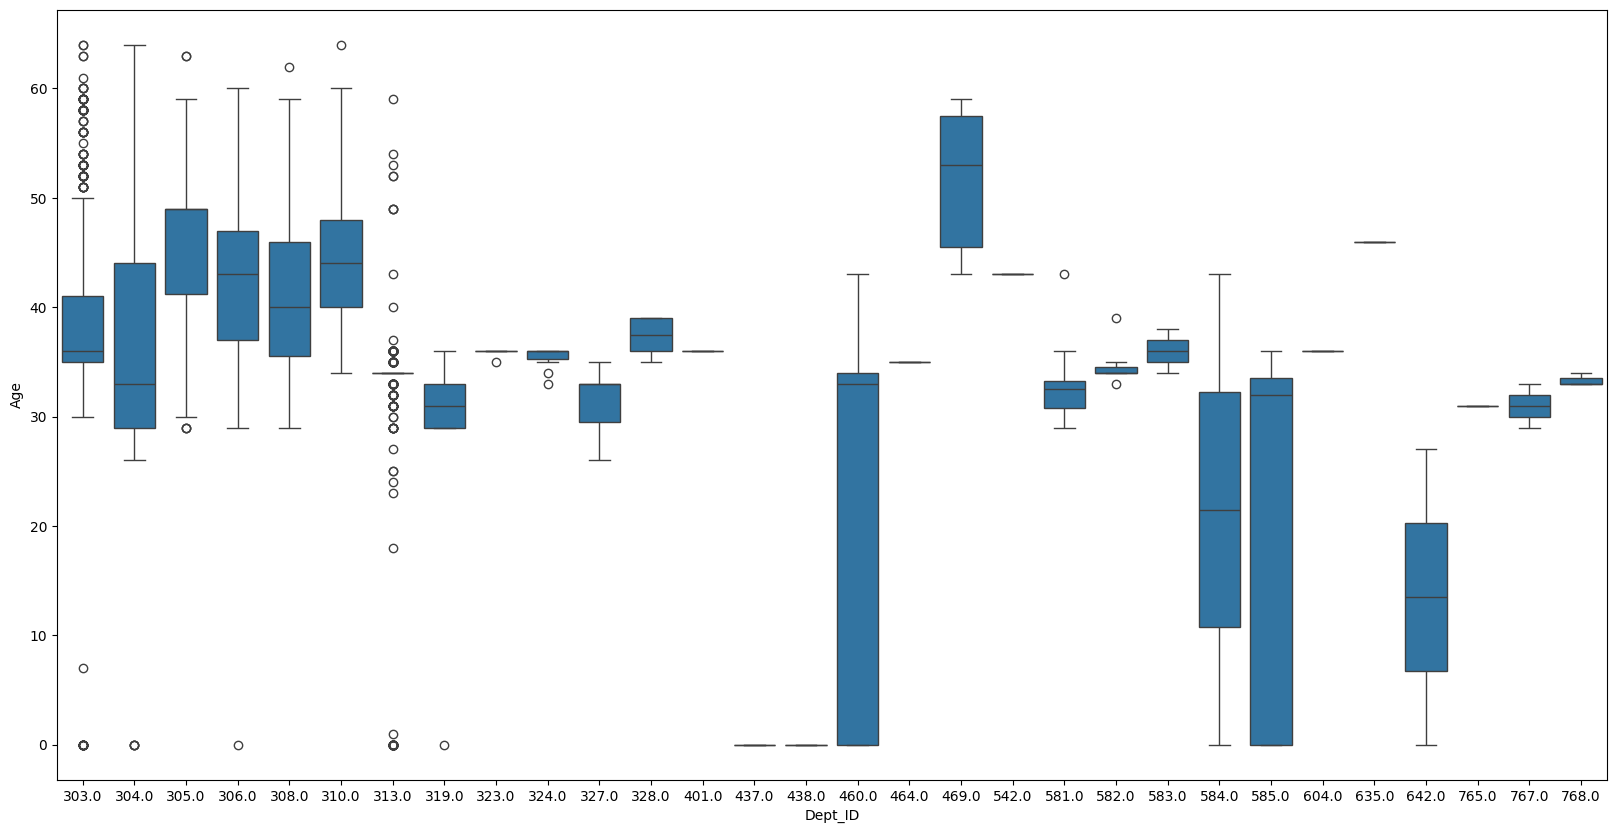

In [45]:
plt.figure(figsize=(20, 10))
sns.boxplot(y=df1["Age"], x=df1["Dept_ID"]) 
plt.show()

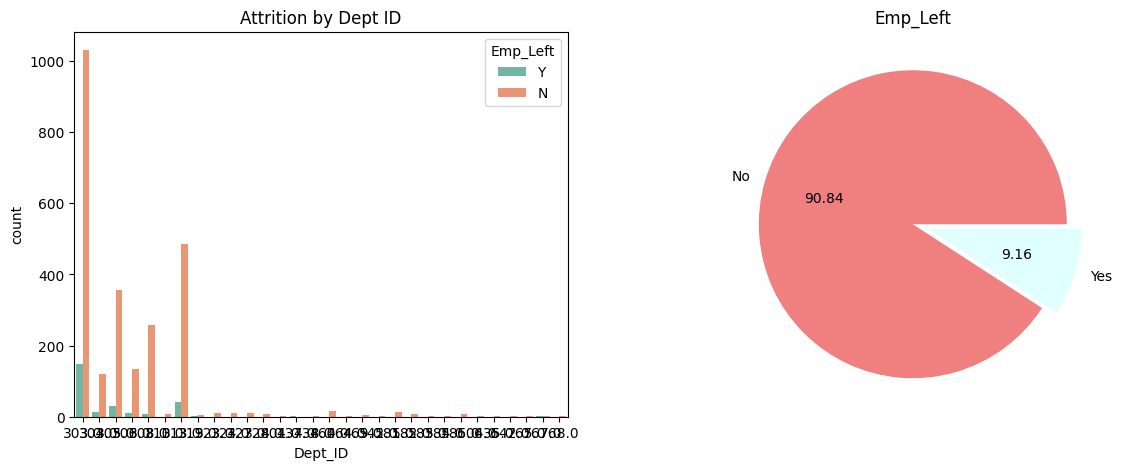

In [46]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='Dept_ID', hue='Emp_Left', data=df1, palette='Set2')
plt.title('Attrition by Dept ID')

plt.subplot(1, 2, 2)
plt.pie(df1['Emp_Left'].value_counts(), colors=['lightcoral', 'lightcyan'], explode=[0, 0.1], autopct='%.2f', labels=['No', 'Yes'])
plt.title('Emp_Left')

plt.show()

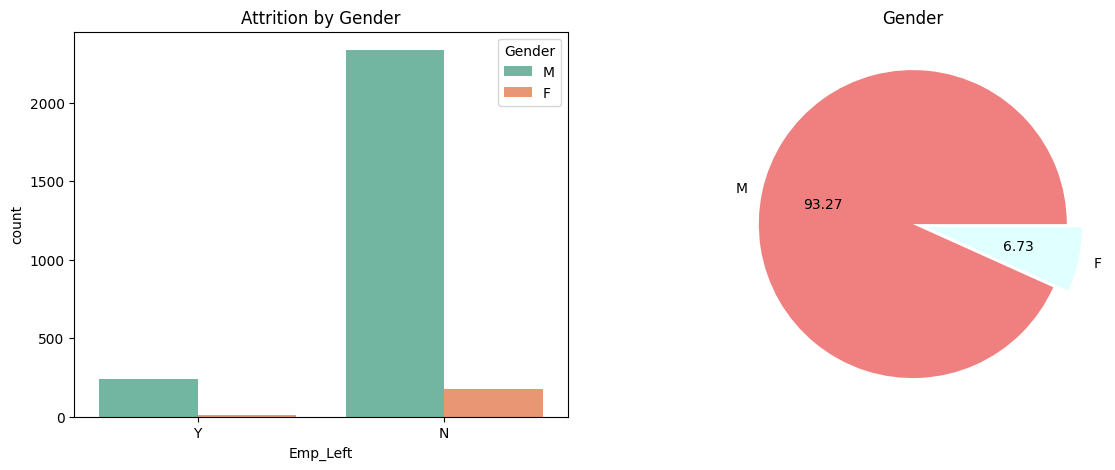

In [47]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='Emp_Left', hue='Gender', data=df1, palette='Set2')
plt.title('Attrition by Gender')

plt.subplot(1, 2, 2)
plt.pie(df1['Gender'].value_counts(), colors=['lightcoral', 'lightcyan'], explode=[0, 0.1], autopct='%.2f', labels=['M', 'F'])
plt.title('Gender')

plt.show()

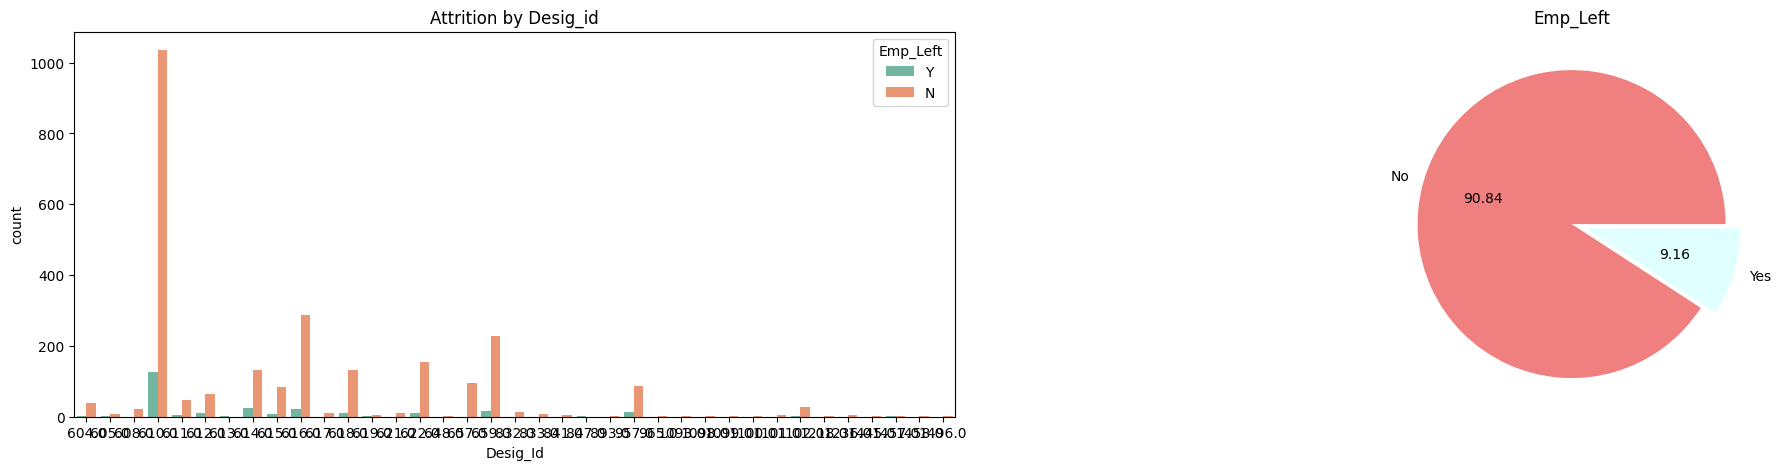

In [48]:
plt.figure(figsize=(25, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='Desig_Id', hue='Emp_Left', data=df1, palette='Set2')
plt.title('Attrition by Desig_id')

plt.subplot(1, 2, 2)
plt.pie(df1['Emp_Left'].value_counts(), colors=['lightcoral', 'lightcyan'], explode=[0, 0.1], autopct='%.2f', labels=['No', 'Yes'])
plt.title('Emp_Left')

plt.show()

C:\Users\trainee\AppData\Local\Temp\ipykernel_11720\4091853207.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df1['Age'] ,data = df1 ,palette='winter_r')


<Axes: xlabel='Age', ylabel='count'>

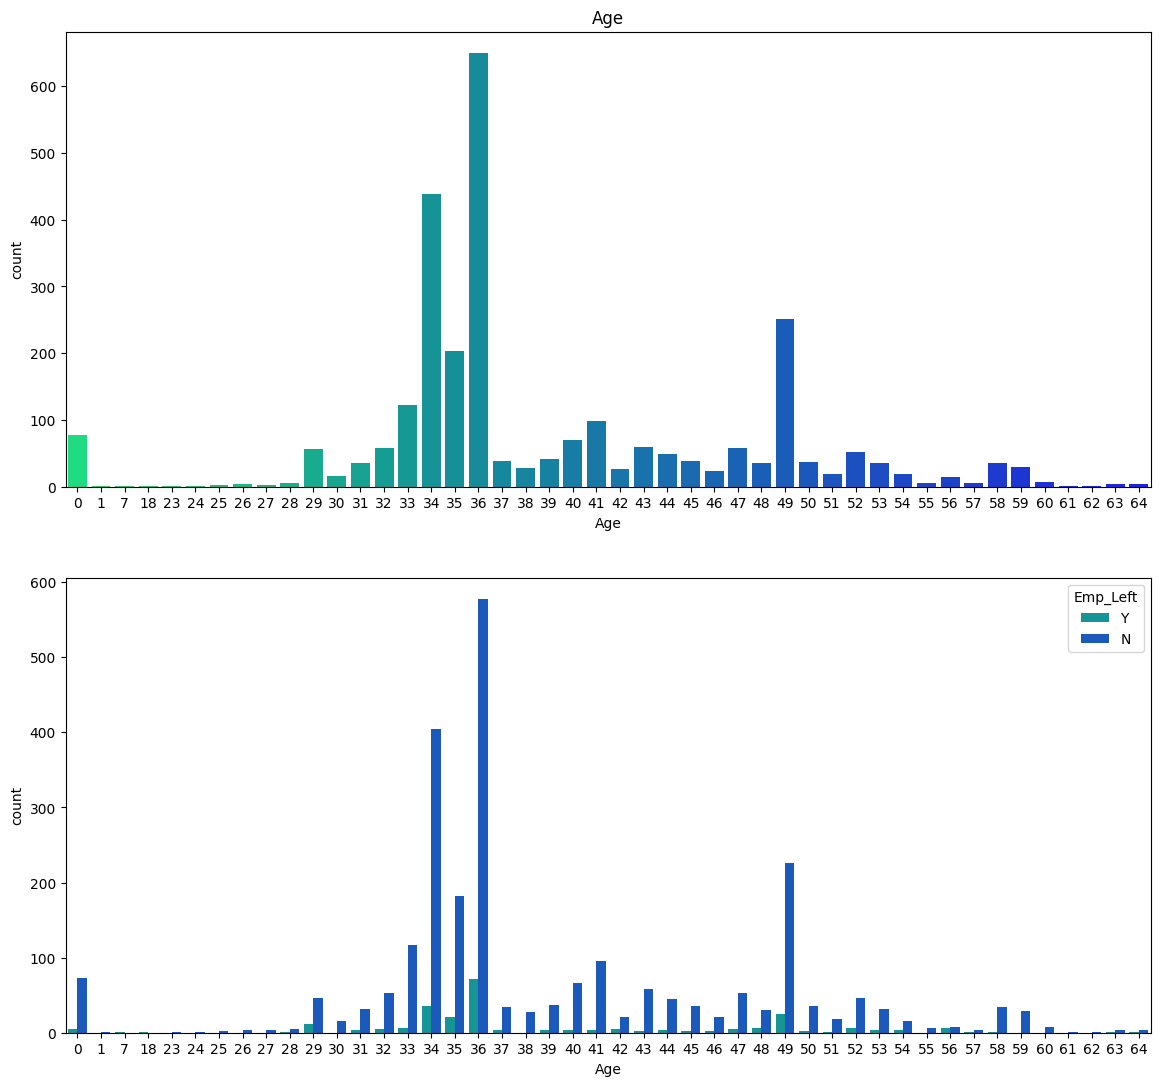

In [49]:

plt.figure(figsize = (14 , 13))
plt.subplot(2 ,1,1)
sns.countplot(x=df1['Age'] ,data = df1 ,palette='winter_r')
plt.title('Age')
plt.subplot(2,1,2)
sns.countplot(x='Age' ,data = df1 ,palette='winter_r'  ,hue ='Emp_Left')

C:\Users\trainee\AppData\Local\Temp\ipykernel_11720\2634415531.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Dept_ID' ,data = df1 ,palette='winter_r')


<Axes: xlabel='count', ylabel='Dept_ID'>

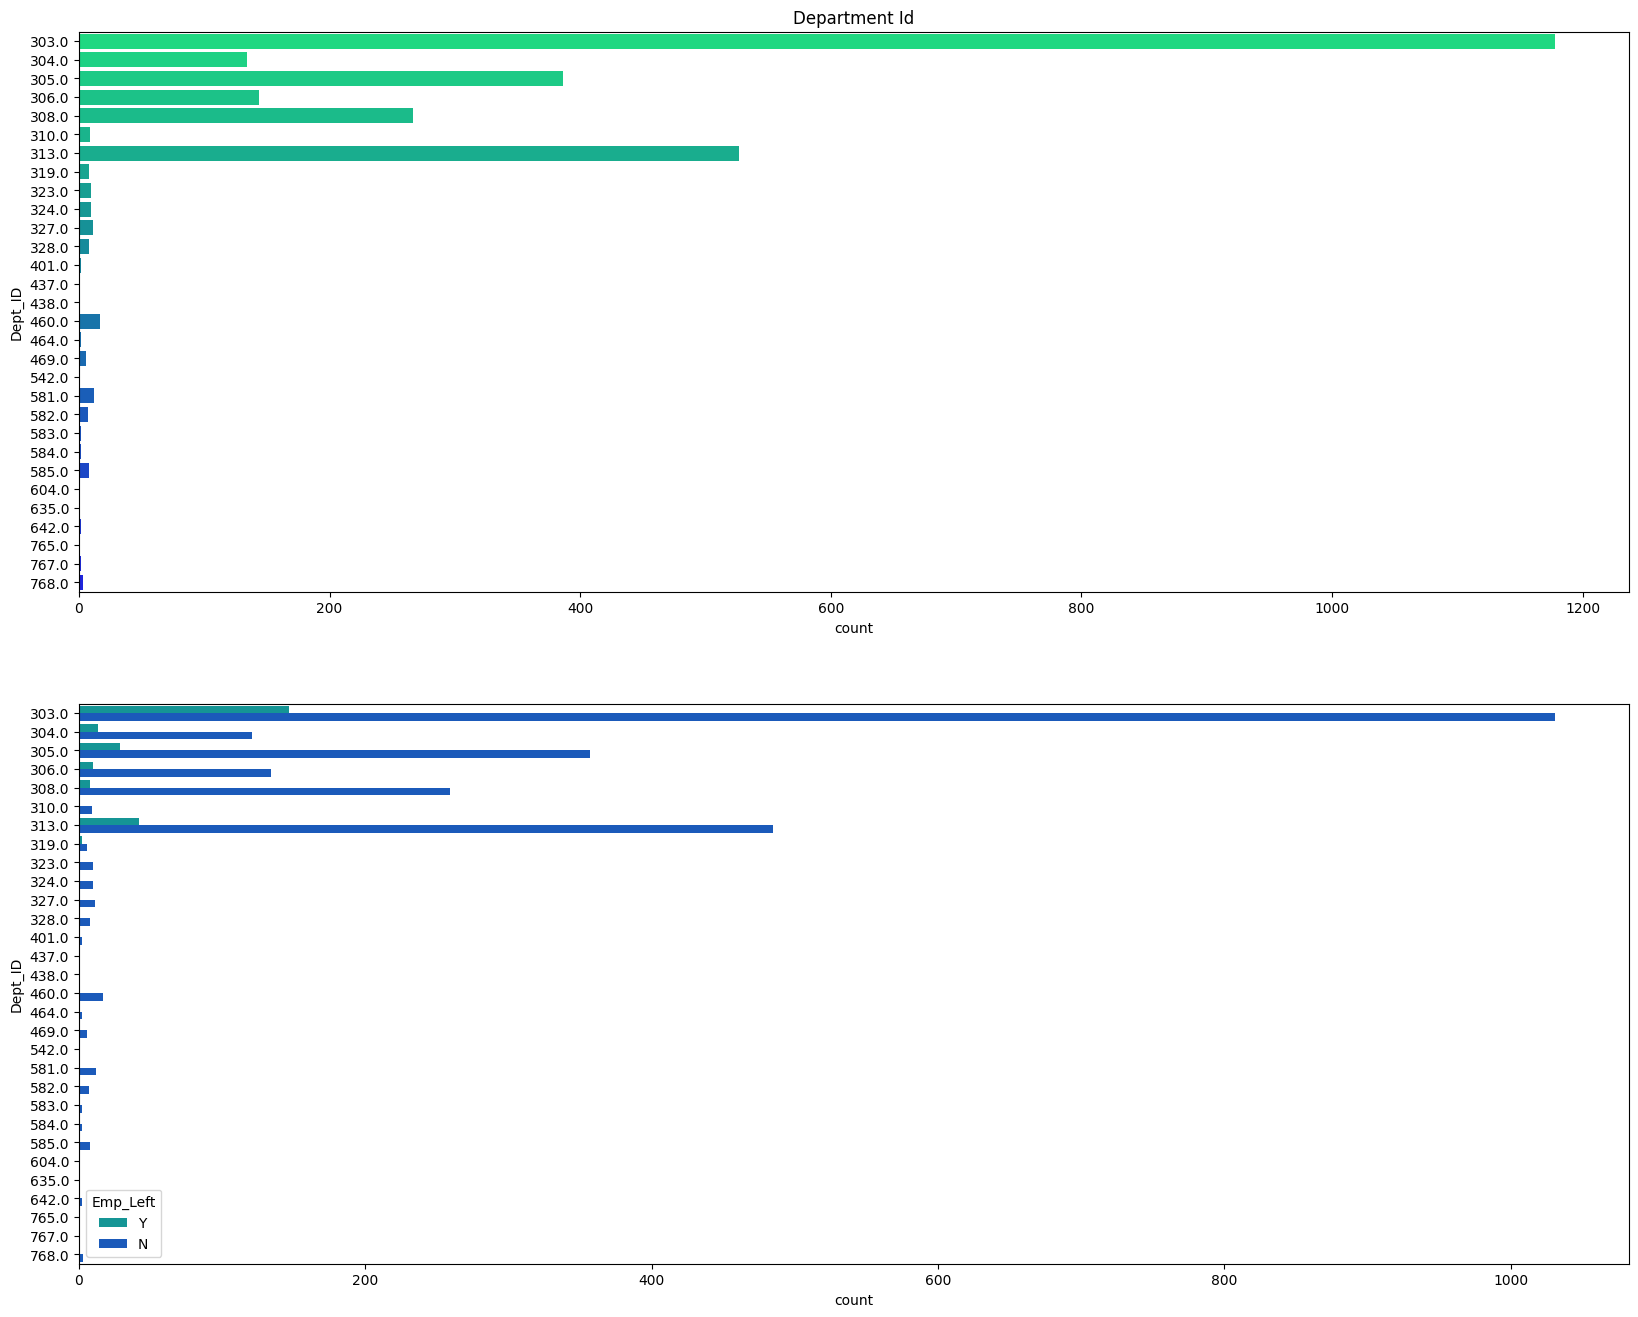

In [50]:
plt.figure(figsize = (20 , 16))
plt.subplot(2 ,1,1)
sns.countplot(y='Dept_ID' ,data = df1 ,palette='winter_r')
plt.title('Department Id')
plt.subplot(2,1,2)
sns.countplot(y='Dept_ID' ,data = df1 ,palette='winter_r'  ,hue =df1['Emp_Left'])

C:\Users\trainee\AppData\Local\Temp\ipykernel_11720\1403729937.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Desig_Id' ,data = df1 ,palette='winter_r')


<Axes: xlabel='count', ylabel='Desig_Id'>

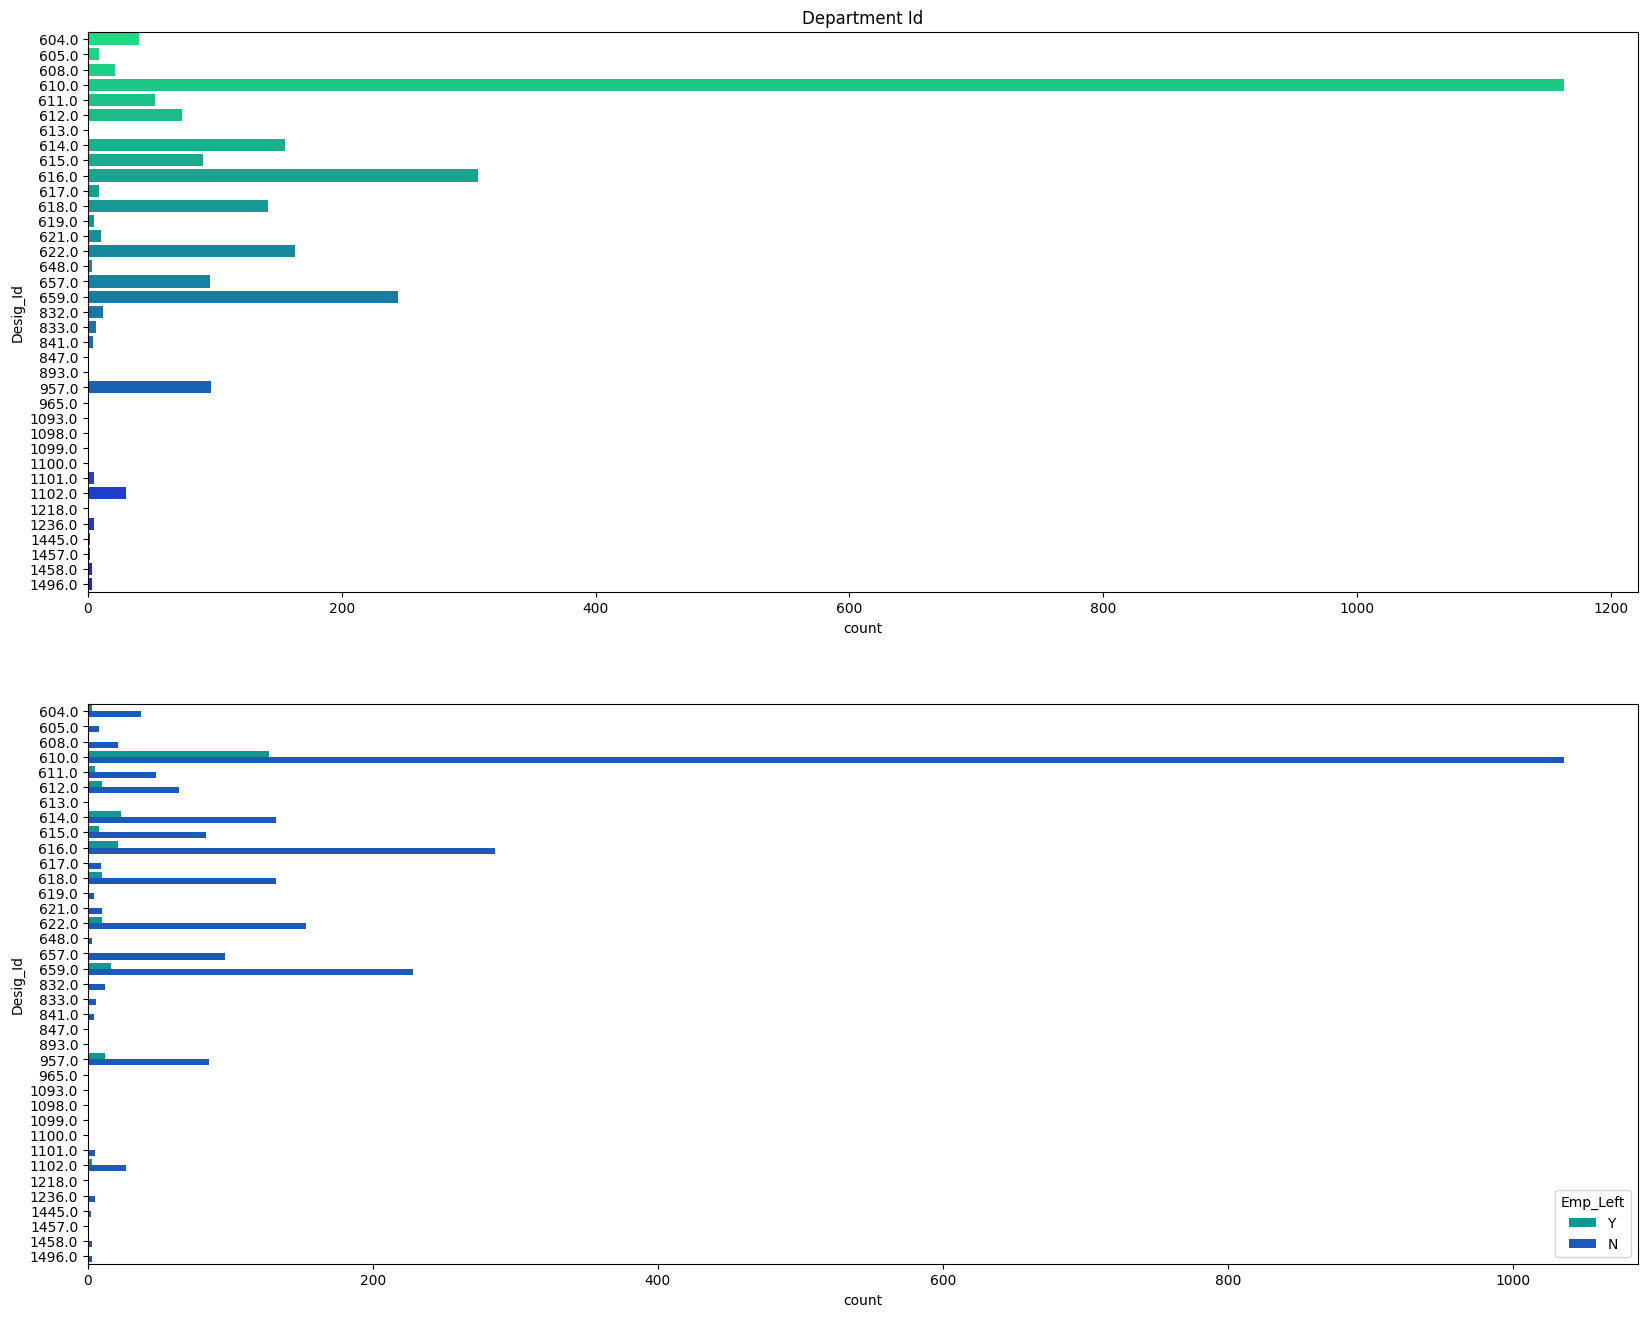

In [51]:
plt.figure(figsize = (20 , 16))
plt.subplot(2 ,1,1)
sns.countplot(y='Desig_Id' ,data = df1 ,palette='winter_r')
plt.title('Department Id')
plt.subplot(2,1,2)
sns.countplot(y='Desig_Id' ,data = df1 ,palette='winter_r'  ,hue =df1['Emp_Left'])

In [52]:
#HANDLING CATEGORICAL OUTPUT VARIABLE
df1['Emp_Left'].replace({'Y':1 ,'N':0} ,inplace = True)
df1['Emp_Left'].head()

C:\Users\trainee\AppData\Local\Temp\ipykernel_11720\581775845.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Emp_Left'].replace({'Y':1 ,'N':0} ,inplace = True)
C:\Users\trainee\AppData\Local\Temp\ipykernel_11720\581775845.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Emp_Left'].

0    1
1    1
2    1
5    0
7    1
Name: Emp_Left, dtype: int64

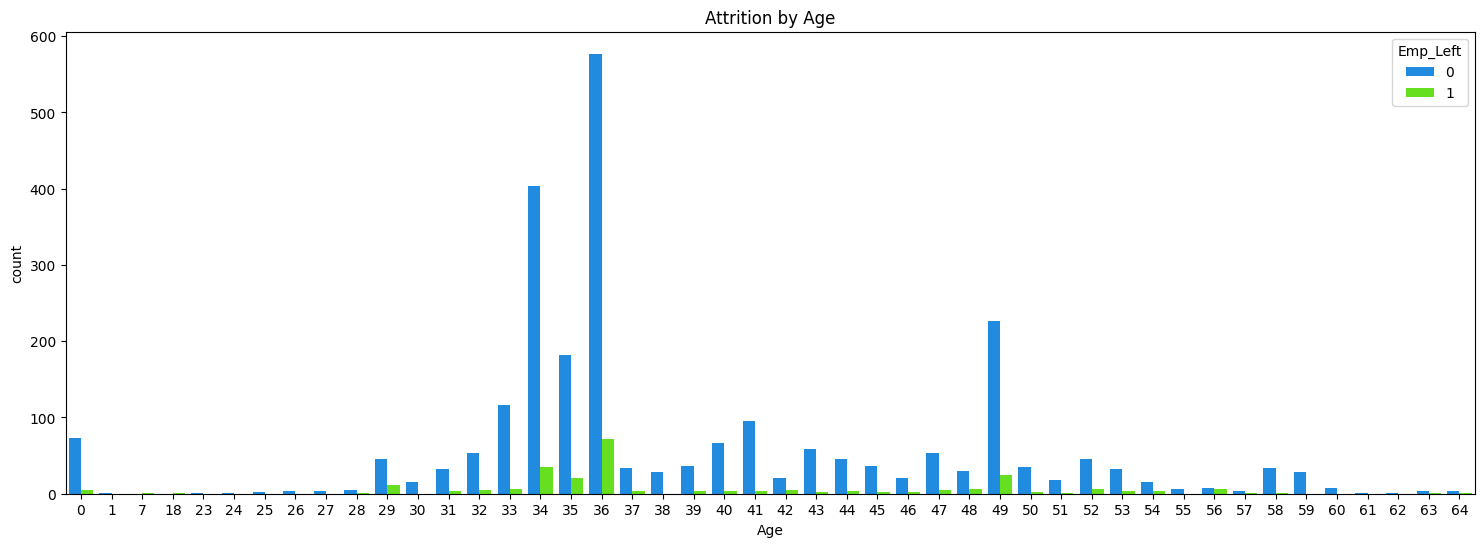

In [53]:
plt.figure(figsize=(40, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Age', hue='Emp_Left', data=df1, palette='gist_rainbow_r')
plt.title('Attrition by Age')

plt.show()



In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2763 entries, 0 to 8041
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Emp_Left        2763 non-null   int64  
 1   Dept_ID         2763 non-null   float64
 2   Age             2763 non-null   int64  
 3   Desig_Id        2763 non-null   float64
 4   Marital_Status  2763 non-null   object 
 5   Gender          2763 non-null   object 
 6   State           2763 non-null   object 
 7   City            2763 non-null   object 
 8   Probation       2763 non-null   float64
 9   Basic_Salary    2763 non-null   float64
 10  Gross_Salary    2763 non-null   float64
dtypes: float64(5), int64(2), object(4)
memory usage: 259.0+ KB


In [55]:
#REMOVING IRRELEVANT FEATURES
# no1_use = []
# for col in df1.columns:
#     if(len(df1[col].unique()) ==1):
#         no1_use.append(col)

# no1_use

In [56]:
# df.drop(columns = no1_use , axis = 1 , inplace = True)

<Axes: >

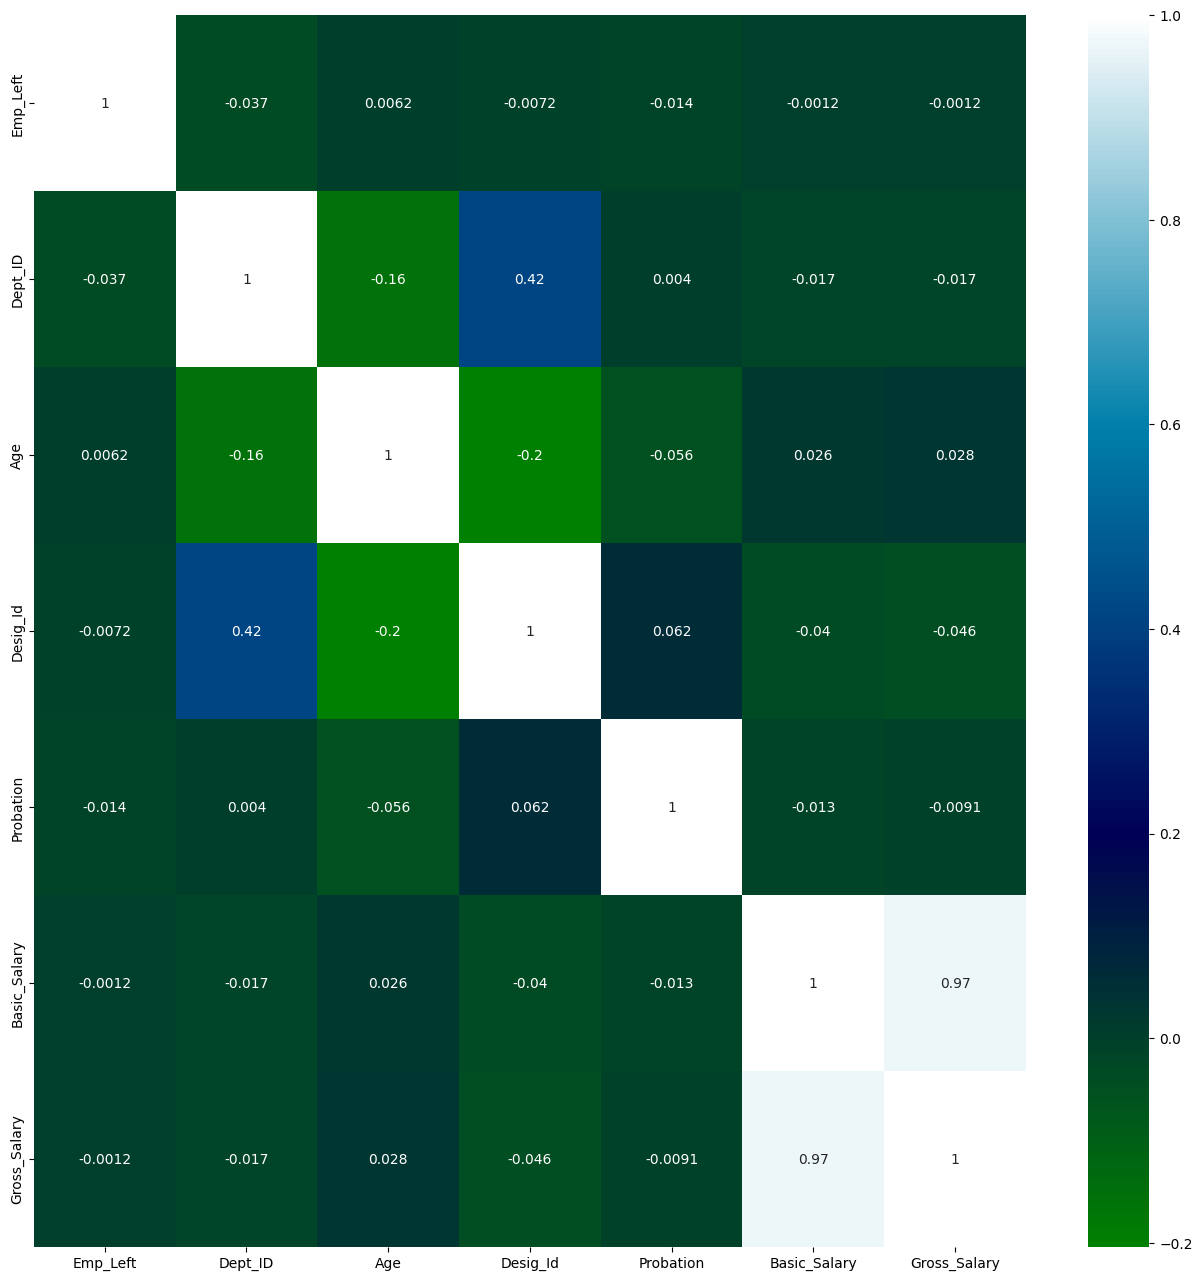

In [57]:
plt.figure(figsize = (16 ,16))
df_num = df1.select_dtypes(include=['float64','int64'])
sns.heatmap(df_num.corr() ,cmap = 'ocean' , cbar = True , annot = True)

In [58]:
#REMOVING IRRELEVANT FEATURES
# no_use = []
# for col in df1.columns:
#     if(len(df1[col].unique()) ==1):
#         no_use.append(col)

# no_use

In [59]:
# df1.drop(columns = no_use , axis = 1 , inplace = True)

In [60]:
others = df1.select_dtypes('object').columns
others

Index(['Marital_Status', 'Gender', 'State', 'City'], dtype='object')

In [61]:
#FEATURE EGNGG
from sklearn.preprocessing import LabelEncoder

In [62]:
le = LabelEncoder()
for col in others:
    df1[col] = le.fit_transform(df1[col])

absorve unbalanced dataset

In [63]:
# def timedelta_to_months(td):
#     return td.days / 30.44

In [64]:
x = df1.drop('Emp_Left' , axis =1)
y = df1['Emp_Left']

print(x.shape ,y.shape)

(2763, 10) (2763,)


In [65]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2763 entries, 0 to 8041
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Dept_ID         2763 non-null   float64
 1   Age             2763 non-null   int64  
 2   Desig_Id        2763 non-null   float64
 3   Marital_Status  2763 non-null   int32  
 4   Gender          2763 non-null   int32  
 5   State           2763 non-null   int32  
 6   City            2763 non-null   int32  
 7   Probation       2763 non-null   float64
 8   Basic_Salary    2763 non-null   float64
 9   Gross_Salary    2763 non-null   float64
dtypes: float64(5), int32(4), int64(1)
memory usage: 194.3 KB


In [66]:
x.isnull().sum()

Dept_ID           0
Age               0
Desig_Id          0
Marital_Status    0
Gender            0
State             0
City              0
Probation         0
Basic_Salary      0
Gross_Salary      0
dtype: int64

In [67]:
(df1.Emp_Left.value_counts()/1470)*100

Emp_Left
0    170.748299
1     17.210884
Name: count, dtype: float64

In [68]:

print(df1)

      Emp_Left  Dept_ID  Age  Desig_Id  Marital_Status  Gender  State  City  \
0            1    303.0   36     604.0               2       1      5    39   
1            1    303.0   41     616.0               2       1      2     1   
2            1    303.0   34     616.0               1       1      3     1   
5            0    305.0   33     615.0               1       1      2     1   
7            1    306.0   36     618.0               1       1      2     1   
...        ...      ...  ...       ...             ...     ...    ...   ...   
8006         0    313.0   34     659.0               1       1     10    34   
8009         0    313.0   34     659.0               1       1     10    34   
8011         1    313.0   34     659.0               1       1     10    34   
8015         0    313.0   34     659.0               1       1     10    34   
8041         0    327.0   26    1445.0               1       1      1    25   

      Probation  Basic_Salary  Gross_Salary  
0    

In [69]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2763 entries, 0 to 8041
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Emp_Left        2763 non-null   int64  
 1   Dept_ID         2763 non-null   float64
 2   Age             2763 non-null   int64  
 3   Desig_Id        2763 non-null   float64
 4   Marital_Status  2763 non-null   int32  
 5   Gender          2763 non-null   int32  
 6   State           2763 non-null   int32  
 7   City            2763 non-null   int32  
 8   Probation       2763 non-null   float64
 9   Basic_Salary    2763 non-null   float64
 10  Gross_Salary    2763 non-null   float64
dtypes: float64(5), int32(4), int64(2)
memory usage: 215.9 KB


In [70]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
x ,y = smote.fit_resample(x ,y)
print(x.shape ,y.shape)

(5020, 10) (5020,)


C:\Users\trainee\AppData\Local\Temp\ipykernel_11720\1834671210.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y ,palette='viridis')


Text(0.5, 1.0, 'Now Class is Balanced')

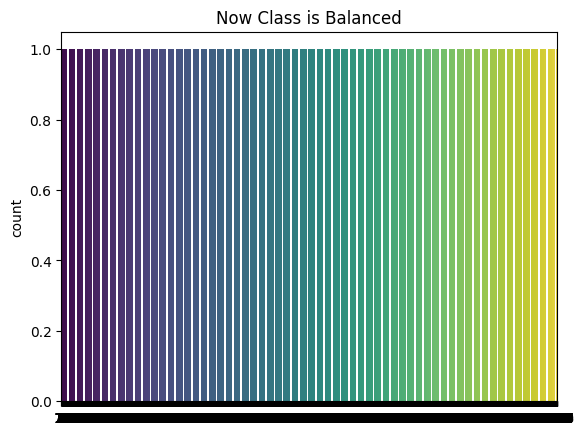

In [71]:
y.value_counts()
sns.countplot(y ,palette='viridis')
plt.title('Now Class is Balanced')

In [72]:
from sklearn.model_selection import train_test_split

# Assuming your dataset is stored in X and y
# X should contain your features, and y should contain your labels

# Splitting the data into training and temporary data (temp_data)
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)

# Splitting the temporary data (temp_data) into validation and testing data
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Now you have three sets: X_train, y_train for training, X_valid, y_valid for validation, and X_test, y_test for testing

In [73]:
# from sklearn.model_selection import train_test_split

# x_train , x_test , y_train ,y_test = train_test_split(x , y, test_size=0.2 , random_state= 52)
# print(x_train.shape)

In [74]:
x_test

,Dept_ID,Age,Desig_Id,Marital_Status,Gender,State,City,Probation,Basic_Salary,Gross_Salary
1835,306.000000,58,616.000000,2,1,6,34,0.0,29000.000000,7492.160000
4529,303.000000,33,614.738530,1,1,10,34,0.0,5052.294066,3267.685587
2117,303.000000,34,610.000000,1,1,10,34,0.0,12000.000000,27950.000000
733,305.000000,49,657.000000,2,1,2,1,0.0,10850.000000,11960.000000
393,303.000000,36,610.000000,1,1,10,34,0.0,15000.000000,22400.000000
...,...,...,...,...,...,...,...,...,...,...
1444,303.000000,34,610.000000,1,1,10,34,0.0,15000.000000,0.000000
109,303.000000,36,610.000000,1,1,2,34,0.0,30000.000000,50751.000000
1614,303.000000,35,610.000000,1,0,10,34,0.0,15000.000000,19332.000000
4225,308.683816,34,889.643739,1,1,10,34,0.0,18317.942100,26595.422951


In [75]:
# saving the dataframe
# x_test[230:].to_csv('encoded.csv', index=False)

In [76]:
x_test.shape

(502, 10)

In [77]:
#scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test) 
x_valid = sc.transform(x_valid)
x_train

array([[-0.20903627,  1.36921255, -0.32972484, ..., -0.0629189 ,
         0.26373096,  0.40352198],
       [-0.20903627, -0.46288041, -0.32972484, ..., -0.0629189 ,
         0.99621942, -0.26882277],
       [ 0.01411389, -1.75612251,  2.40839828, ..., -0.0629189 ,
        -0.40291874, -0.39895189],
       ...,
       [-0.02861951, -0.46288041, -0.01711744, ..., -0.0629189 ,
        -0.26366074, -0.18863644],
       [ 0.08117036, -0.57065059, -0.20687166, ..., -0.0629189 ,
        -0.17576212, -0.47080893],
       [-0.20903627,  1.69252308, -0.32972484, ..., -0.0629189 ,
        -0.02926443,  0.03157352]])

In [78]:
x_test

array([[-0.12012091,  2.12360377, -0.26684186, ..., -0.0629189 ,
         0.23443142, -0.43621721],
       [-0.20903627, -0.57065059, -0.2800627 , ..., -0.0629189 ,
        -0.46722532, -0.51992542],
       [-0.20903627, -0.46288041, -0.32972484, ..., -0.0629189 ,
        -0.26366074, -0.03084391],
       ...,
       [-0.20903627, -0.35511024, -0.32972484, ..., -0.0629189 ,
        -0.17576212, -0.20161009],
       [-0.04057675, -0.46288041,  2.60108038, ..., -0.0629189 ,
        -0.07854795, -0.05768494],
       [-0.20903627, -0.24734006, -0.28239293, ..., -0.0629189 ,
        -0.02926443,  0.34545412]])

In [79]:
#MODEL SELECTION (Cross Validation)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [80]:
k = KFold(n_splits = 5)

In [81]:
#MODEL
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [82]:
#DECISION TREE CLASSIFIER
dt_model = DecisionTreeClassifier()
dt_score = cross_val_score(dt_model , x_train , y_train ,cv = k ,scoring = 'neg_mean_squared_error')
dt_score.mean()

-0.130727433814737

In [83]:
model_params ={
    'RandomForestClassifier':
    {
        'model':RandomForestClassifier(),
        'param':
        {
         'n_estimators':[10 ,50 ,100,130],
         'criterion':['gini' ,'entropy'],
         'max_depth':range(4,8,1),
        }
    },
    'SVC':
    {
        'model':SVC(),
        'param':
        {
            'C':[1,20],
            'gamma':[1,0.1],
            'kernel':['rbf']
        }
    }
}

In [84]:
scores =[]
for model_name , mp in model_params.items():
    model_sel = GridSearchCV(estimator= mp['model'] ,param_grid= mp['param'] ,cv = 4 ,return_train_score=False)
    # model_sel.fit(x_train,y_train)
    model_sel.fit(x_test,y_test)
    scores.append({
        'model':model_name,
        'best_score':model_sel.best_score_,
        'best_params':model_sel.best_params_
    })

In [85]:
scores

[{'model': 'RandomForestClassifier',
  'best_score': 0.8026825396825397,
  'best_params': {'criterion': 'gini', 'max_depth': 7, 'n_estimators': 130}},
 {'model': 'SVC',
  'best_score': 0.6970793650793651,
  'best_params': {'C': 20, 'gamma': 1, 'kernel': 'rbf'}}]

In [86]:
#MODEL SCORES
from sklearn.metrics import confusion_matrix , accuracy_score ,classification_report

In [87]:
# model = RandomForestClassifier(random_state = 42)
# accuracies = cross_val_score(model, x_train, y_train, cv=5)
# model.fit(x_train,y_train)
# y_pred = model.predict(x_test)
# y_train_pred = model.predict(x_train)
 
# #Obtain accuracy
# print("Train Score:",np.mean(accuracies))
# print("Test Score:",model.score(x_test,y_test))
# print("Accuracy Score", accuracy_score(y_test, y_pred))

In [88]:
model = RandomForestClassifier(random_state = 42)
accuracies = cross_val_score(model, x_train, y_train, cv=5)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_train_pred = model.predict(x_train)
 
#Obtain accuracy
print("Train Score:",np.mean(accuracies))
print("Test Score:",model.score(x_test,y_test))
print("Accuracy Score", accuracy_score(y_test, y_pred))

Train Score: 0.9043806496781348
Test Score: 0.9163346613545816
Accuracy Score 0.9163346613545816


In [89]:
x_test

array([[-0.12012091,  2.12360377, -0.26684186, ..., -0.0629189 ,
         0.23443142, -0.43621721],
       [-0.20903627, -0.57065059, -0.2800627 , ..., -0.0629189 ,
        -0.46722532, -0.51992542],
       [-0.20903627, -0.46288041, -0.32972484, ..., -0.0629189 ,
        -0.26366074, -0.03084391],
       ...,
       [-0.20903627, -0.35511024, -0.32972484, ..., -0.0629189 ,
        -0.17576212, -0.20161009],
       [-0.04057675, -0.46288041,  2.60108038, ..., -0.0629189 ,
        -0.07854795, -0.05768494],
       [-0.20903627, -0.24734006, -0.28239293, ..., -0.0629189 ,
        -0.02926443,  0.34545412]])

In [90]:
x_test
print(type(x_test))

<class 'numpy.ndarray'>


In [91]:
y_pred

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,

In [92]:
prediction = model.predict([x_test[2]])
prediction

array([0], dtype=int64)

In [93]:
li = y_pred.T.tolist()

In [94]:
{f"{x}": li.count(x) for x in li}

{'0': 263, '1': 239}

In [95]:
# from sklearn.pipeline import make_pipeline

# >>> model = make_pipeline(StandardScaler(), LinearRegression())
# >>> model.fit(X_train, y_train)
# Pipeline(steps=[('standardscaler', StandardScaler()),
#                 ('linearregression', LinearRegression())])
# >>> mean_squared_error(y_test, model.predict(X_test))

In [96]:
#MODEL SCORES REPORT
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92       277
           1       0.88      0.94      0.91       225

    accuracy                           0.92       502
   macro avg       0.91      0.92      0.92       502
weighted avg       0.92      0.92      0.92       502



In [97]:
print(classification_report(y_train , y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1985
           1       0.97      0.99      0.98      2031

    accuracy                           0.98      4016
   macro avg       0.98      0.98      0.98      4016
weighted avg       0.98      0.98      0.98      4016



<Axes: >

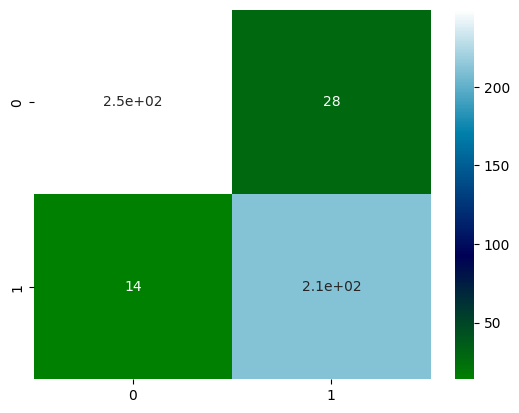

In [98]:
sns.heatmap(confusion_matrix(y_test ,y_pred) ,annot = True ,cmap ='ocean')

In [99]:
# import pickle
# with open('attr_model.pkl', 'wb') as file:
#     pickle.dump(model, file)

In [100]:
# with open('attr_model.pkl', 'rb') as f:
#     mod = pickle.load(f)

In [101]:
total_emp = df1.loc[(df1['Emp_Left']==0)]
total_emp

,Emp_Left,Dept_ID,Age,Desig_Id,Marital_Status,Gender,State,City,Probation,Basic_Salary,Gross_Salary
5,0,305.0,33,615.0,1,1,2,1,0.0,30000.0,49871.00
8,0,306.0,41,618.0,1,1,2,34,0.0,30000.0,49871.00
9,0,306.0,51,618.0,1,1,2,34,0.0,30000.0,49871.00
10,0,306.0,35,618.0,1,1,2,1,0.0,30000.0,49871.00
11,0,306.0,40,618.0,1,1,2,1,0.0,30000.0,49871.00
...,...,...,...,...,...,...,...,...,...,...,...
8005,0,313.0,34,659.0,1,1,10,34,0.0,17500.0,26500.00
8006,0,313.0,34,659.0,1,1,10,34,0.0,19000.0,28600.00
8009,0,313.0,34,659.0,1,1,10,34,0.0,17500.0,26500.00
8015,0,313.0,34,659.0,1,1,10,34,0.0,9300.0,75020.00


In [102]:
max_priority = df1.loc[(df1['Emp_Left'] == 0) & (df1['Dept_ID'] >= 313.0) & (df1['Dept_ID'] <= 315.0) & (df1['Basic_Salary'] <= 10000) & (df1['Gender'] == 1) & (df1['Age'] >= 34) & (df1['Age'] <= 40)]
per = (len(max_priority)/len(total_emp)) * 100
print("This list of Employee Left the company within 30 Day , with 90 percent Acc" )
max_priority

# Company Employee Left under 30 Days 

This list of Employee Left the company within 30 Day , with 90 percent Acc


,Emp_Left,Dept_ID,Age,Desig_Id,Marital_Status,Gender,State,City,Probation,Basic_Salary,Gross_Salary
5710,0,313.0,34,659.0,6,1,10,34,0.0,6000.0,9700.00
5714,0,313.0,35,659.0,2,1,10,34,0.0,5000.0,7000.00
6403,0,313.0,34,659.0,6,1,10,34,0.0,7000.0,15576.90
6504,0,313.0,36,659.0,5,1,10,34,0.0,2000.0,2153.84
6660,0,313.0,34,659.0,2,1,10,34,0.0,0.0,2000.00
6668,0,313.0,34,659.0,1,1,10,34,0.0,0.0,2000.00
6680,0,313.0,34,659.0,5,1,10,34,0.0,0.0,2000.00
7006,0,313.0,34,622.0,1,1,10,34,0.0,9500.0,0.00
7055,0,313.0,34,659.0,1,1,10,34,0.0,9900.0,0.00
7243,0,313.0,35,659.0,1,1,10,34,0.0,7000.0,0.00


In [103]:
max_priority = df1.loc[(df1['Dept_ID'] >= 313.0) & (df1['Dept_ID'] <= 315.0) & (df1['Basic_Salary'] <= 18000) & (df1['Gender'] == 0) & (df1['Age'] >= 45)]
per = (len(max_priority)/len(total_emp)) * 100
print(f"This list of Female Employee  Count {len(max_priority)}, Left the company within 30 Day , with 90 percent Acc" )
max_priority

This list of Female Employee  Count 0, Left the company within 30 Day , with 90 percent Acc


,Emp_Left,Dept_ID,Age,Desig_Id,Marital_Status,Gender,State,City,Probation,Basic_Salary,Gross_Salary


In [104]:
medium_priority = df1.loc[(df1['Dept_ID'] > 767.0) & (df1['Dept_ID'] < 780.0) & ( df1['Emp_Left'] == 0) & (df1['Basic_Salary'] <= 25000) & (df1['Gender'] == 1) & (df1['Age'] <= 40)]
per = (len(medium_priority)/len(total_emp)) * 100
print(f"This list of Employee Male Count {len(medium_priority)},  Left the company Within 60 day , with 90 percent Acc" )
medium_priority

# Company Left under 60 Days 

This list of Employee Male Count 2,  Left the company Within 60 day , with 90 percent Acc


,Emp_Left,Dept_ID,Age,Desig_Id,Marital_Status,Gender,State,City,Probation,Basic_Salary,Gross_Salary
7746,0,768.0,33,1458.0,1,1,10,34,0.0,18000.0,36809.7
7747,0,768.0,33,1458.0,1,1,10,34,0.0,18000.0,56380.7


In [105]:
medium_priority = df1.loc[(df1['Dept_ID'] > 767.0) & (df1['Dept_ID'] < 780.0) & ( df1['Emp_Left'] == 47) & (df1['Basic_Salary'] <= 25000) & (df1['Gender'] == 0) & (df1['Age'] >= 30)]
per = (len(medium_priority)/len(total_emp)) * 100
print(f"This list of Employee Female Count {len(medium_priority)},  Left the company Within 60 day , with 90 percent Acc" )
medium_priority

This list of Employee Female Count 0,  Left the company Within 60 day , with 90 percent Acc


,Emp_Left,Dept_ID,Age,Desig_Id,Marital_Status,Gender,State,City,Probation,Basic_Salary,Gross_Salary


In [106]:
low_attrition = df1.loc[(df1['Dept_ID'] > 313.0) & (df1['Dept_ID'] < 766.0) & ( df1['Emp_Left'] == 0) & (df1['Basic_Salary'] <= 18000) & (df1['Gender'] == 1) & (df1['Age'] <= 700)]
per = (len(low_attrition)/len(total_emp)) * 100
print("This list of Employee Left the company Within 90 -120 day, with greater than 90 percent Acc" )
low_attrition

# Company Left under 90-180 Days 

This list of Employee Left the company Within 90 -120 day, with greater than 90 percent Acc


,Emp_Left,Dept_ID,Age,Desig_Id,Marital_Status,Gender,State,City,Probation,Basic_Salary,Gross_Salary
1750,0,328.0,36,610.0,1,1,10,34,0.0,15000.0,23400.00
2020,0,324.0,36,611.0,1,1,10,34,0.0,5000.0,9388.00
2246,0,323.0,36,610.0,1,1,10,34,0.0,16000.0,25100.00
2247,0,323.0,36,610.0,1,1,10,34,0.0,15000.0,23700.00
2248,0,323.0,36,610.0,1,1,10,34,0.0,14000.0,22300.00
...,...,...,...,...,...,...,...,...,...,...,...
7779,0,585.0,0,1102.0,1,1,10,34,0.0,14500.0,7200.00
7984,0,581.0,34,659.0,1,1,10,34,0.0,14500.0,22300.00
7986,0,460.0,34,659.0,1,1,10,34,0.0,15000.0,44748.68
7989,0,585.0,0,1236.0,1,1,10,34,0.0,17000.0,25800.00


In [107]:
low_attrition = df1.loc[(df1['Dept_ID'] > 313.0) & (df1['Dept_ID'] < 766.0) & ( df1['Emp_Left'] == 0)& (df1['Basic_Salary'] <= 18000) & (df1['Gender'] == 0) & (df1['Age'] <= 700)]
per = (len(low_attrition)/len(total_emp)) * 100
print(f"This list of Employee Females Count {len(low_attrition)} Left the company Within 90 -120 day, with greater than 90 percent Acc" )
low_attrition

This list of Employee Females Count 11 Left the company Within 90 -120 day, with greater than 90 percent Acc


,Emp_Left,Dept_ID,Age,Desig_Id,Marital_Status,Gender,State,City,Probation,Basic_Salary,Gross_Salary
6434,0,319.0,33,612.0,1,0,10,34,0.0,8000.0,1775.00
6556,0,582.0,35,659.0,5,0,10,34,0.0,12000.0,19190.00
6601,0,582.0,39,1099.0,5,0,10,34,0.0,4800.0,4800.00
6602,0,581.0,43,1098.0,2,0,7,22,0.0,6000.0,6000.00
6985,0,581.0,32,832.0,1,0,10,34,0.0,18000.0,30034.31
6997,0,581.0,30,1102.0,1,0,10,34,0.0,18000.0,3113.93
7002,0,581.0,33,621.0,1,0,10,34,0.0,18000.0,30619.31
7003,0,581.0,29,621.0,1,0,10,34,0.0,15000.0,11001.02
7008,0,581.0,33,832.0,1,0,3,40,0.0,15000.0,0.00
7098,0,327.0,33,621.0,1,0,10,34,0.0,18000.0,30824.31
